In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings
from prophet import Prophet

In [10]:
df = pd.read_csv(r"C:\Users\daniy\Downloads\archive (6)\GOOG.csv")
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
1,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086
3,2004-08-26,53.773445,52.134586,52.279045,53.753517,7128620.0,53.753517
4,2004-08-27,54.107193,52.647663,53.848164,52.876804,6241307.0,52.876804


In [11]:
df.shape

(4120, 7)

### Visualizing the data for better insights

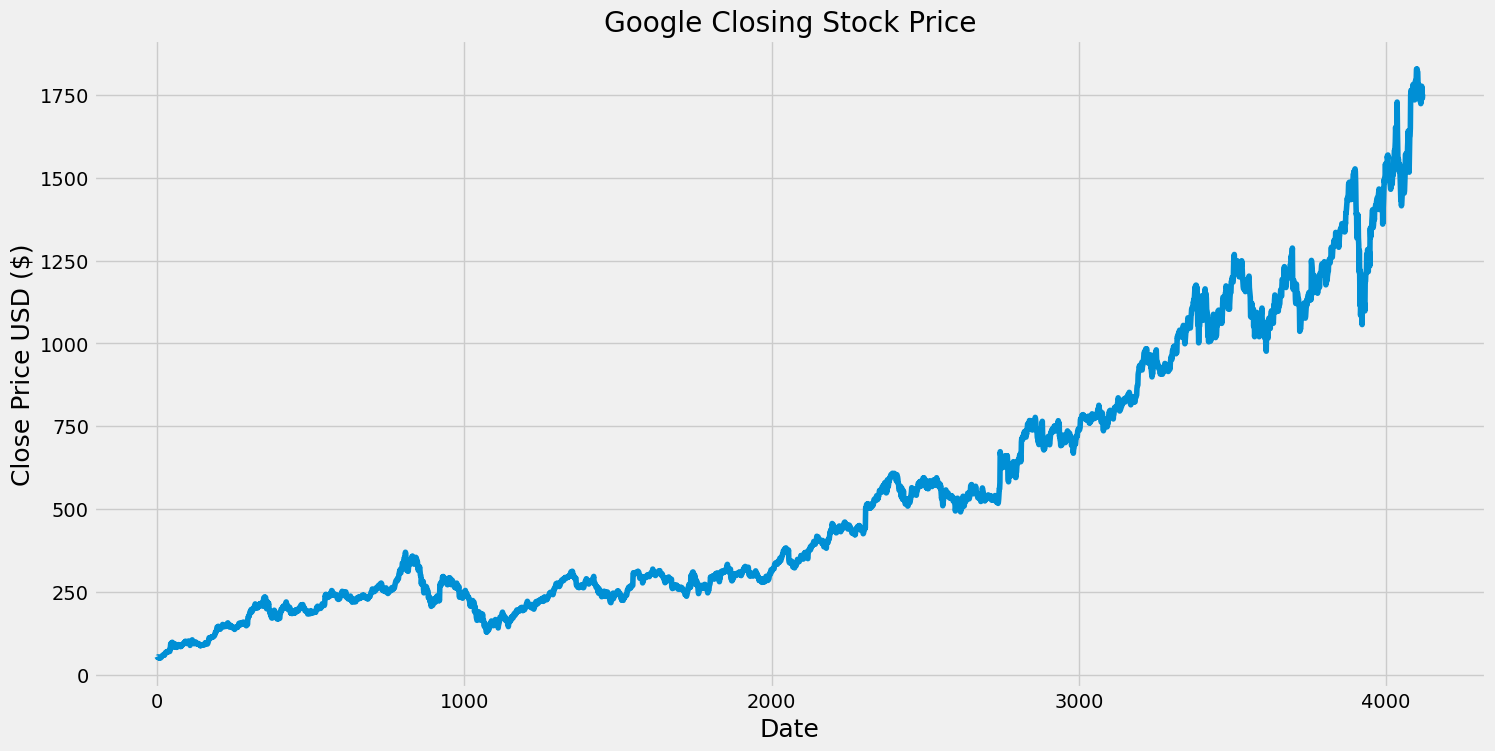

In [23]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [24]:
df = df[["Date","Close"]] 
df = df.rename(columns = {"Date":"ds","Close":"y"})
df.head()

,ds,y
0,2004-08-23,54.495735
1,2004-08-24,52.239197
2,2004-08-25,52.802086
3,2004-08-26,53.753517
4,2004-08-27,52.876804


### Let's fit the data to the Facebook Prophet model

In [25]:
m = Prophet(daily_seasonality=True)
m.fit(df)

21:31:41 - cmdstanpy - INFO - Chain [1] start processing
21:31:42 - cmdstanpy - INFO - Chain [1] done processing


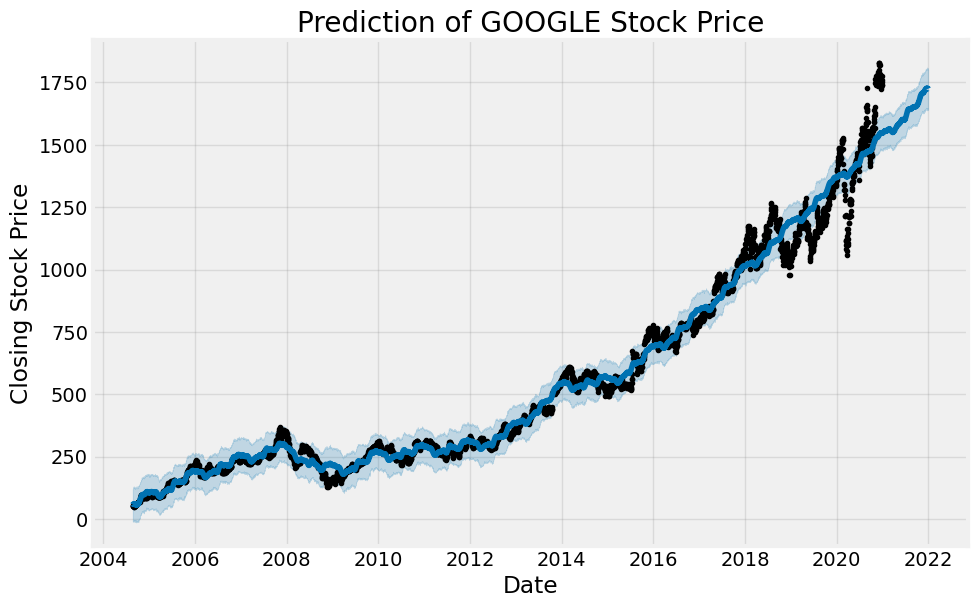

In [26]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

#### Now let’s have a look at the seasonal affects on this prediction that is made by our model:

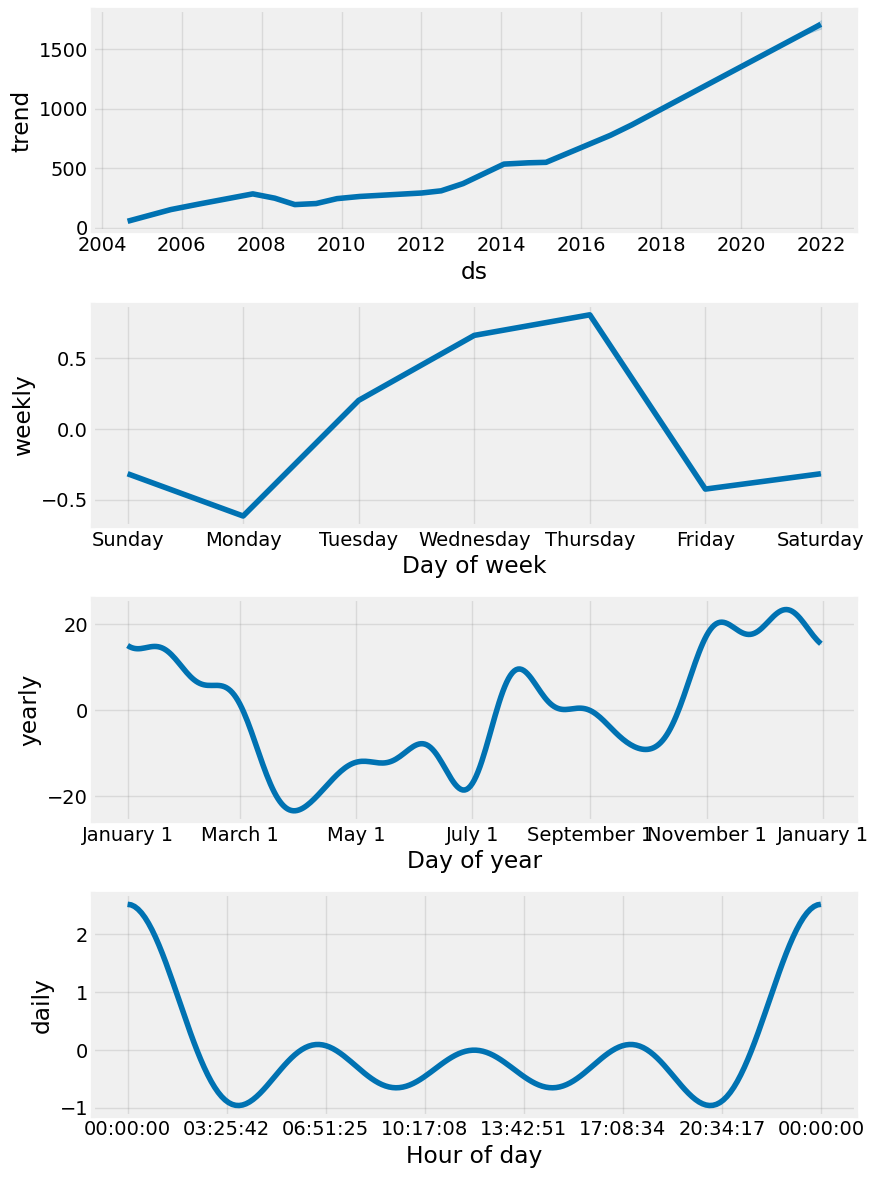

In [27]:
m.plot_components(predictions)
plt.show()